In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
contador = 1
def teste(row):
    global contador
    if (row['Switch'] == 'HW'):
        return contador
    else:
        retorno = contador
        contador += 1
        return retorno

In [3]:
df = pd.read_table("../Saidas/Teste1/info_sw.txt", sep=" ")
df["Medicao"] = df.apply (teste, axis=1)
df.reset_index().set_index('index', drop=False)
df

,Tempo,Switch,RegrasInstaladas,RegrasAceitas,VezesBloqueado,BytesEnviados,Medicao
0,17,HW,2,2,0,0,1
1,17,SW,204,767,0,60741576,1
2,32,HW,100,100,0,128102688,2
3,33,SW,179,1034,0,60741576,2
4,47,HW,99,100,1,385621992,3
5,48,SW,214,1194,0,60741576,3
6,62,HW,97,101,1,759896424,4
7,63,SW,238,1266,0,60741576,4
8,77,HW,94,104,1,1238592600,5
9,78,SW,244,1314,0,60753672,5


In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

(   Tempo Switch  RegrasInstaladas  RegrasAceitas  VezesBloqueado  \
0     17     HW                 2              2               0   
1     17     SW               204            767               0   

   BytesEnviados  Medicao  
0              0        1  
1       60741576        1  , '\n\n')
(   Tempo Switch  RegrasInstaladas  RegrasAceitas  VezesBloqueado  \
2     32     HW               100            100               0   

   BytesEnviados  Medicao  
2      128102688        2  , '\n\n')
(   Tempo Switch  RegrasInstaladas  RegrasAceitas  VezesBloqueado  \
3     33     SW               179           1034               0   

   BytesEnviados  Medicao  
3       60741576        2  , '\n\n')
(   Tempo Switch  RegrasInstaladas  RegrasAceitas  VezesBloqueado  \
4     47     HW                99            100               1   

   BytesEnviados  Medicao  
4      385621992        3  , '\n\n')
(   Tempo Switch  RegrasInstaladas  RegrasAceitas  VezesBloqueado  \
5     48     SW        

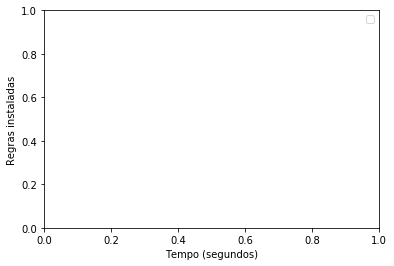

In [5]:
#Agrupando por switch
gpb = df.groupby (['Tempo'])
for key,item in gpb:
    print(gpb.get_group(key), "\n\n")
    
plt.xlabel('Tempo (segundos)')
plt.ylabel('Regras instaladas')
plt.gca().legend(('Switch HW','Switch SW'))
#plt.savefig('grafico_teste'.pdf')